# Projeto de processamento de linguagem natural

Bem-vindo ao Projeto NLP para esta seção do curso. Neste projeto NLP, você estará tentando classificar Avaliações da Yelp em categorias de 1 estrela ou 5 estrelas com base no conteúdo do texto nas revisões. Este será um procedimento mais simples do que a palestra, pois utilizaremos os métodos do pipeline para tarefas mais complexas.

Usaremos o [Conjunto de dados de reviews da Yelp da Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Cada observação neste conjunto de dados é uma revisão de um determinado negócio por um determinado usuário.

A coluna "stars" é o número de estrelas (1 a 5) atribuídas pelo revisor ao negócio (mis estrelas é melhor.) 
A coluna "cool" é o número de votos "legais" que esta avaliação recebeu de outros usuários de usuários.

Todas as avaliações começam com 0 votos "legais", e não há limite para quantos votos "legais" podem receber uma avaliação. Em outras palavras, é uma classificação da revisão em si, não uma classificação do negócio.

As colunas "useful" e "funny" são semelhantes à coluna "cool".

Vamos começar! Basta seguir as instruções abaixo!

 ## Importações
  ** Importe as bibliotecas habituais. **

In [1]:
import numpy as np
import pandas as pd

## Os dados

** Leia o arquivo yelp.csv e configure-o como um dataframe chamado yelp. **

In [2]:
yelp = pd.read_csv('yelp.csv')

** Verifique os métodos head(), info() e describe() em yelp. **


In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


** Crie uma nova coluna chamada "comprimento do texto", que é o número de palavras na coluna de texto. **

In [26]:
yelp['text length'] = yelp['text'].apply(len)
yelp['text length'].head()

0     889
1    1345
2      76
3     419
4     469
Name: text length, dtype: int64

# Análise exploratória de dados

Vamos explorar os dados

## Importações

** Importe as bibliotecas de visualização de dados se você ainda não o fez. **

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Use o FacetGrid da biblioteca seaborn para criar uma grid de 5 histogramas de comprimento de texto com base nas classificações das estrelas. Consulte a documentação Seaborn para obter dicas sobre como fazer isso, caso não lembre. **

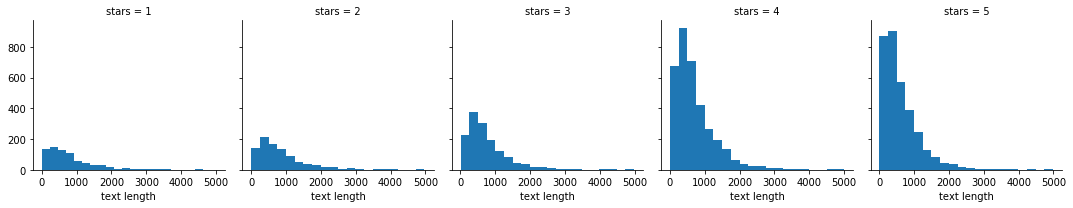

In [28]:
g = sns.FacetGrid(data=yelp,  col="stars")
g.map(plt.hist, "text length", bins=20)

** Crie um boxplot do comprimento de texto para cada categoria de estrelas. **

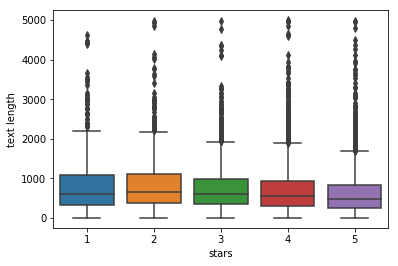

In [32]:
sns.boxplot(x=yelp['stars'], y=yelp['text length'])

** Crie um countplot do número de ocorrências para cada tipo de classificação de estrelas. **

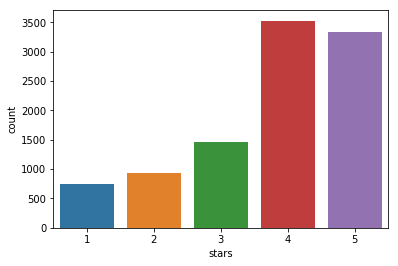

In [33]:
sns.countplot(x=yelp['stars'])

** Use groupby para obter os valores médios das colunas numéricas. **

In [45]:
stars = yelp.groupby(by='stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


** Use o método corr () nesse conjunto de dados groupby para produzir este dataframe: **

In [46]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


** Em seguida, use Seaborn para criar um heatmap com base em que .corr () dataframe: **

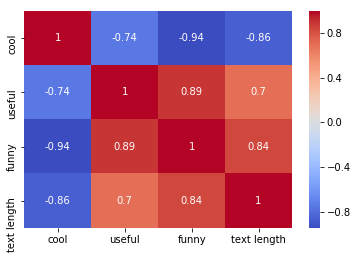

In [49]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

## Tarefa de classificação de PNL

Vamos passar para a tarefa atual. Para tornar as coisas um pouco mais fáceis, vá em frente e apenas pegue comentários que foram de 1 estrela ou 5 estrelas.

**Crie um banco de dados chamado yelp_class que contenha as colunas do banco de dados do yelp, mas apenas para as avaliações de 1 ou 5 estrelas.**

In [63]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

** Crie dois objetos X e y. X será a coluna "texto" de yelp_class e y será a coluna 'estrelas' do yelp_class.**

In [65]:
X = yelp_class['text']
y = yelp_class['stars']

** Import CountVectorizer e crie um objeto CountVectorizer. **

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Use o método fit_transform no objeto CountVectorizer e passe em X (a coluna 'texto'). Salve esse resultado substituindo X. **

In [68]:
X = cv.fit_transform(X)

## Divisão treino-teste

Vamos dividir nossos dados em dados de treinamento e teste.

** Use train_test_split para dividir os dados em X_train, X_test, y_train, y_test. Use test_size = 0.3 e random_state = 101 **

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training a Model

Tempo para treinar o modelo!

** Import MultinomialNB e crie uma instância do estimador e o chame de nb **

In [72]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

** Agora ajuste nb usando os dados de treinamento. **

In [73]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Previsões e avaliações

Tempo para ver como nosso modelo ficou!

** Use o método predict() do nb para prever X_test. **

In [79]:
predictions = nb.predict(X_test)

** Crie uma matriz de confusão e um relatório de classificação usando essas previsões e y_test **

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
print(confusion_matrix(y_test, predictions))
print('')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Ótimo! Vamos ver o que acontece se tentarmos incluir o TF-IDF nesse processo usando um pipeline. **

# Usando o processamento de texto

**Importe TfidfTransformer do sklearn.**

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer

**Importe Pipeline da sklearn.**

In [83]:
from sklearn.pipeline import Pipeline

**Agora crie um pipeline com as seguintes etapas: CountVectorizer (), TfidfTransformer (), MultinomialNB ()**

In [99]:
# pipeline = Pipeline(steps=[
#     ('bow', CountVectorizer()),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
# ])

pipeline = Pipeline(steps=[
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

**Hora de usar o pipeline! Lembre-se de que este pipeline já possui todas as suas etapas de pré-processo, o que significa que precisaremos re-dividir os dados originais (Lembre-se de que sobrecarregamos o X como a versão CountVectorized. O que precisamos é apenas o texto**

### Divisão treino-teste

** Refaça a divisão treino-teste no objeto yelp_class. **

In [100]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

** Agora ajuste o pipeline aos dados de treinamento. Lembre-se de que você não pode usar os mesmos dados de treinamento da última vez porque esses dados já foram vetados. Precisamos passar apenas no texto e nos rótulos **

In [101]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Previsões e Avaliação

** Agora use o pipeline para prever a partir do X_test e crie um relatório de classificação e uma matriz de confusão. Você deve notar resultados estranhos. **

In [102]:
predictions = pipeline.predict(X_test)

In [98]:
#Com o tfidf
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
#Sem o tfidf
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[155  73]
 [ 15 983]]
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226



Parece que o Tf-Idf realmente piorou as coisas!

É isto para este projeto. 
** Algumas outras coisas para tentar .... **
Tente voltar e brincar com as etapas do pipeline e ver se criar um analisador personalizado como fizemos na aula... Ou recrie o pipeline com apenas o CountVectorizer() e NaiveBayes. A mudança do modelo ML no final para outro classificador ajudou?

In [ ]:
Retirar o tfidf ajudou. Passamos de praticamente 0 e 81% de precisão para mais de 90 e 90%